In [1]:
import numpy as np
import pandas as pd

In [2]:
movies= pd.read_csv('tmdb_5000_movies.csv')
credits= pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [5]:
movies= movies.merge(credits, on='title')

In [6]:
movies.shape

(4809, 23)

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [8]:
#genres
#id
#keywords
#title
#overview
#release_date
#cast
#crew

In [9]:
movies= movies[['id','title','keywords','genres','overview','cast','crew']]
movies.head(3)

,id,title,keywords,genres,overview,cast,crew
0,19995,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [10]:
#checking if there is any null data
movies.isnull().sum()

id          0
title       0
keywords    0
genres      0
overview    3
cast        0
crew        0
dtype: int64

In [11]:
movies.dropna(inplace=True)
#removes any row in the 'movies' DataFrame that contains at least one missing value, and the changes are applied to the original 'movies' DataFrame itself due to the inplace=True parameter.

In [12]:
movies.isnull().sum()

id          0
title       0
keywords    0
genres      0
overview    0
cast        0
crew        0
dtype: int64

In [13]:
movies.duplicated().sum()

0

In [14]:
movies.iloc[0].genres
# integer-location based indexing(iloc)
# retrieves value in 'genres' col for first row

#here we get list of dictionary from genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [15]:
#convert('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')
#string indices must be integers err will be shown 
#to correct above: doing following step

In [16]:
import ast 
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [17]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [18]:
#for every movie list of genres are listed
movies['genres'] = movies['genres'].apply(convert)

In [19]:
movies.head()

,id,title,keywords,genres,overview,cast,crew
0,19995,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
movies['keywords']= movies['keywords'].apply(convert)

In [21]:
movies.head()

,id,title,keywords,genres,overview,cast,crew
0,19995,Avatar,"[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[based on novel, mars, medallion, space travel...","[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
def convert3(obj):
    L= []
    counter= 0
    for i in ast.literal_eval(obj):
        if counter !=3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [23]:
movies['cast']= movies['cast'].apply(convert3)

In [24]:
movies.head()

,id,title,keywords,genres,overview,cast,crew
0,19995,Avatar,"[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[based on novel, mars, medallion, space travel...","[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [25]:
def fetch_dir(obj):
    L= []
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

In [26]:
movies['crew']= movies['crew'].apply(fetch_dir)

In [27]:
movies.head()

,id,title,keywords,genres,overview,cast,crew
0,19995,Avatar,"[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[based on novel, mars, medallion, space travel...","[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [28]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [29]:
#converting above into list
movies['overview'] = movies['overview'].apply(lambda x:x.split())
#split each string in the 'overview' column into a list of words. 

In [30]:
movies.head(2)

,id,title,keywords,genres,overview,cast,crew
0,19995,Avatar,"[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [31]:
#converting Sam Worthington to SamWorthington
#coz it might take Sam and Worthington as 2 diff entity
movies['genres']= movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords']= movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']= movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']= movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [32]:
movies.head(2)

,id,title,keywords,genres,overview,cast,crew
0,19995,Avatar,"[cultureclash, future, spacewar, spacecolony, ...","[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


In [33]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [34]:
movies.head(2)

,id,title,keywords,genres,overview,cast,crew,tags
0,19995,Avatar,"[cultureclash, future, spacewar, spacecolony, ...","[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."


In [35]:
new_df= movies[['id', 'title', 'tags']]

In [36]:
new_df

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [37]:
#converting the tags column from list to string
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\harsh\AppData\Local\Temp\ipykernel_13756\660215333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))


In [38]:
new_df.head()

,id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [39]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

C:\Users\harsh\AppData\Local\Temp\ipykernel_13756\3214958533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [40]:
new_df.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


VECTORIZATION: converting words to vectors in order to find the most relatable words from "tags" to recommend movies.

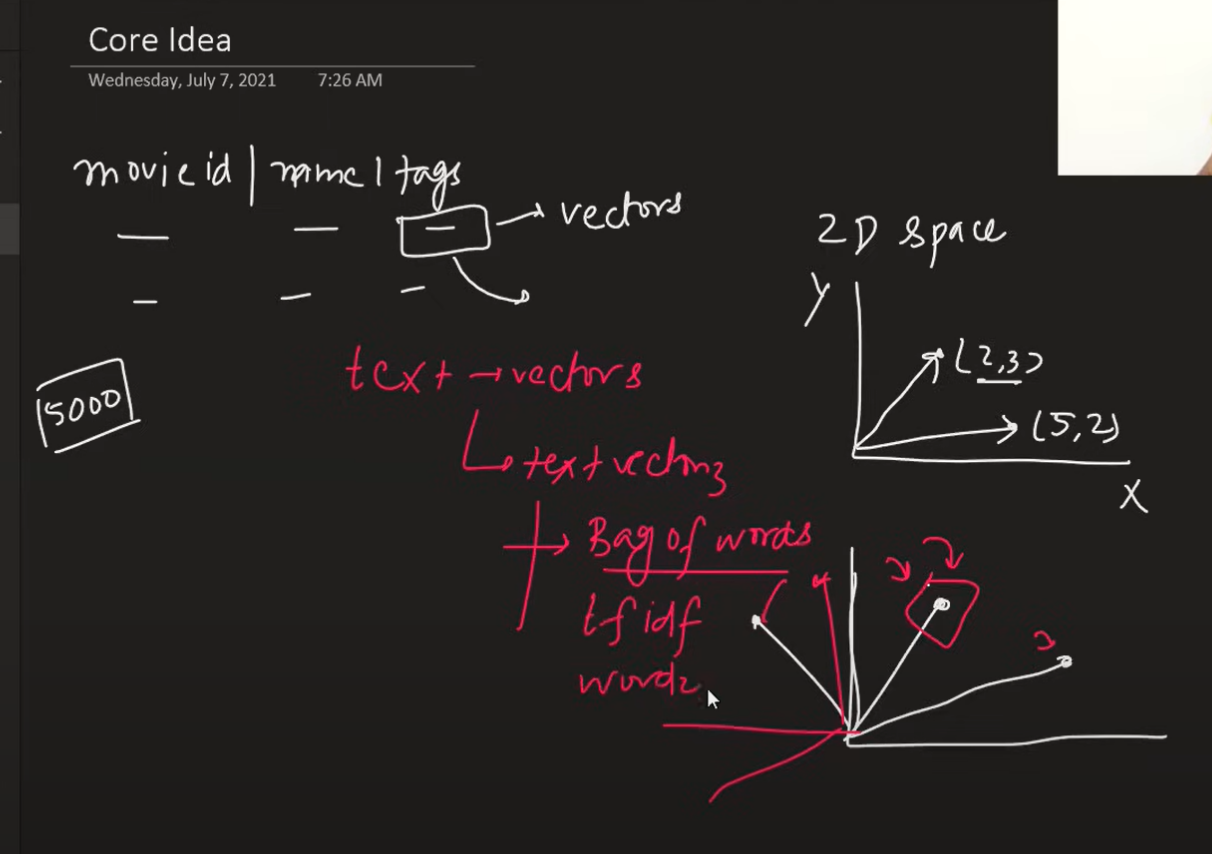

### Bag of words:
concatenate all the tags and then we find frequency where we will not use "stop words"

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words='english')

In [42]:
vectors = cv.fit_transform(new_df['tags'])

In [43]:
vectors.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
vectors.shape

(4806, 5000)

In [45]:
cv.get_feature_names()
#gives the words which come appear in "corpse" multiple times

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1930s',
 '1940s',
 '1950',
 '1950s',
 '1960s',
 '1970s',
 '1980',
 '1980s',
 '1985',
 '1990s',
 '1999',
 '19th',
 '19thcentury',
 '20',
 '200',
 '2009',
 '20th',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '60s',
 '70',
 '70s',
 'aaron',
 'aaroneckhart',
 'abandoned',
 'abducted',
 'abigailbreslin',
 'abilities',
 'ability',
 'able',
 'aboard',
 'abuse',
 'abusive',
 'academy',
 'accept',
 'accepted',
 'accepts',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accompanied',
 'accomplish',
 'account',
 'accountant',
 'accused',
 'ace',
 'achieve',
 'act',
 'acting',
 'action',
 'actionhero',
 'actions',
 'activist',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'adam',
 'adams',
 'adamsandler',
 'adamshankman',
 'adaptation',
 'adapted',
 'addict',
 'addicted',
 'addiction',
 'adolescence',
 'adolescent'

In [46]:
len(cv.get_feature_names())
#as we provided 5000 as max feature

5000

## staming
technique in which similar words like loved, loving, love will be replaced by "love" ie one word

In [47]:
import nltk

In [48]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [49]:
def stem(text):
    y= []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [50]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\harsh\AppData\Local\Temp\ipykernel_13756\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [51]:
#repeating all the stepss of vectorization "except of importing as staming has been applied to the tags list"

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words='english')

In [53]:
vectors = cv.fit_transform(new_df['tags'])
vectors.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
vectors.shape

(4806, 5000)

In [55]:
#here we can see that "action and actions" have been replaced by the "action" through staming
cv.get_feature_names()

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult'

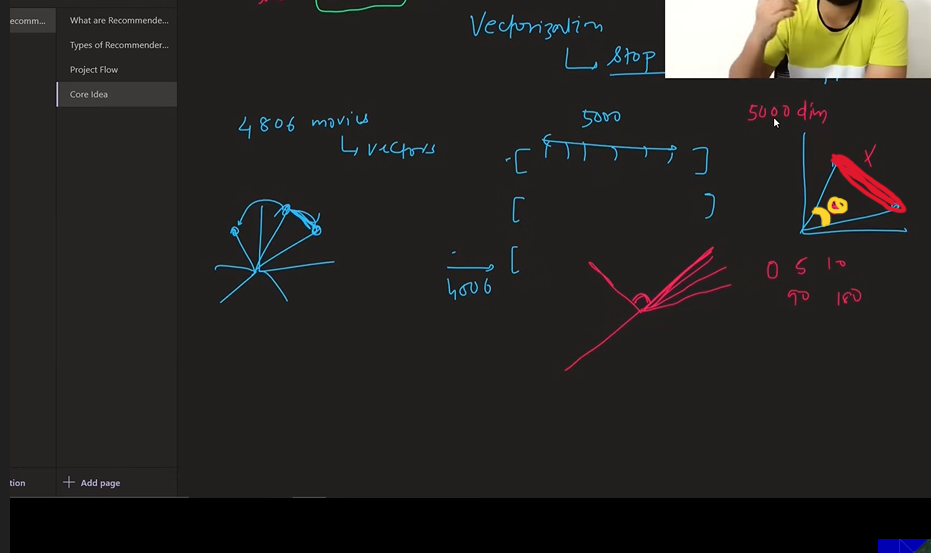
here we will find the dist btw the diff vectors(movies) in order to find the relatativity btw them. 
the red line represents the euclidean diff btw 2 vectors THAT WE WILL NOT TAKE(we never take ecd).
the yellow angle represents the cosine dist WE WILL USE

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
similarity= cosine_similarity(vectors)

In [58]:
#similarity abive is the array of arrays and it's diagonal will always be 1
similarity[1]

array([0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
       0.02615329])

In [60]:
#how to fetch index:
new_df[new_df['title'] == 'Batman Begins'].index[0]

119

In [63]:
#sorting of the similarity matrix is done in reverse order to get most similar(closer to 1) movies dist
#sorted(similarity[0], reverse=True)
#but sorting will make index position loose
#to save from it we will use enumerate funct and then put it into a list for
#sorted(list(enumerate(similarity[0])), reverse=True)
#but this shows the sorting based on movie indexes rather we need it based on vector distances
sorted(list(enumerate(similarity[0])), reverse=True, key= lambda x:x[1])[1:6]

[(1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

In [66]:
#here we get indexes of similar movies
#before below code
recommend('Avatar')

1216
2409
3730
507
539


In [67]:
new_df.iloc[1216].title

'Aliens vs Predator: Requiem'

In [68]:
def recommend(movie):
    movie_index= new_df[new_df['title'] == movie].index[0]
    
    distances = similarity[movie_index]
    
    movie_list = sorted(list(enumerate(distances)), reverse=True, key= lambda x:x[1])[1:6]
    
    for i in movie_list:
        print(new_df.iloc[i[0]].title)

In [69]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [70]:
recommend('Batman Begins')

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


In [72]:
#to show the list of close movies on pycharm website

In [73]:
import pickle

In [74]:
pickle.dump(new_df, open('movies.pkl','wb'))

In [75]:
new_df['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [76]:
pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [78]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [1]:
new_df.head()

NameError: name 'new_df' is not defined